In [6]:
import numpy as np

In [7]:
import scipy.stats as ss

In [8]:
my_mu = 5
my_sigma = 10
size = 10000

returns = ss.norm.rvs(loc = my_mu, scale = my_sigma, size = size)

In [9]:
np.mean(returns)

4.999603207737527

In [10]:
np.std(returns)

9.99046184238544

In [ ]:
    def sample(self, size):
        """
        This method sample from the lognormal distribution.
        Pay attenction: we have to handle a diversity between parameters provided 
        by ngboos and scipy sampler. The following transformations are studied to 
        match the two convenctions.
        :param size: number or sampled value
        :return: np vector containg samples
        """

        # Rename just to make the term convenction clearer
        mean = self.param_scale
        std = self.param_s

        # Transform the parameters
        my_mu = np.log(mean**2/np.sqrt(mean**2 + std**2))
        my_sigma = np.log(1+(std**2)/(mean**2))

        # Sampling from normal 
        samples = ss.norm.rvs(loc = my_mu, scale = my_sigma, size = size)

        # Trasform the samples
        samples = np.exp(samples)

        return samplesb


In [119]:
from surgeryschedulingunderuncertainty.uncertainty_profile import LogNormalDistribution, NormalDistribution

In [12]:
dist = LogNormalDistribution(param_s=2, param_scale=3)

In [13]:
dist.sample(10)

array([1.855637  , 3.09072292, 6.72167657, 4.0599746 , 3.06697935,
       2.23231142, 2.09012967, 2.44759765, 1.58041088, 2.77260284])

In [114]:
param_s = 57
param_scale  = .25

uncertaintyprofile = LogNormalDistribution(param_s, param_scale)
samples = np.log(uncertaintyprofile.sample(10000))

new_mean = np.log(param_scale**2/np.sqrt(param_scale**2 + param_s**2))
new_std = np.log(1+(param_s**2)/(param_scale**2))

    
tollerance = 2e-1
print(np.isclose(np.mean(samples), new_mean, atol=tollerance))
print(np.isclose(np.std(samples), new_std, atol=tollerance))
        

True
True


In [115]:
new_mean

-6.815649608325926

In [116]:
new_std

10.85871049441207

In [117]:
np.mean(samples)

-6.701016436304206

In [118]:
np.std(samples)

10.881988313080797

In [164]:
param_loc = 163
param_scale = 163

size = 10000
tollerance = 1

uncertaintyprofile = NormalDistribution(param_loc, param_scale)
samples = uncertaintyprofile.sample(size)

print(param_scale / param_loc)

print(np.mean(samples))
print(np.std(samples))

print(np.isclose(np.mean(samples), param_loc, atol=tollerance))
print(np.isclose(np.std(samples), param_scale, atol=tollerance))

!!! Please check the correctness of this function!
1.0
164.00269312278033
163.89681969961939
False
True


In [167]:
import numpy as np

# Esempio di vettore ordinato
values = np.array([1, 2, 3, 4, 5])
probs = np.array([.1, .2, .4, .2, .1])

# Creazione di un nuovo vettore con la media a coppie
bins_exterma = (values[:-1] + values[1:]) / 2

print(bins_exterma)

[1.5 2.5 3.5 4.5]


In [169]:
weighted_mean = np.sum(values * probs)/ np.sum(probs)

print(weighted_mean)

2.9999999999999996


In [172]:
weighted_variance = np.sum((values - weighted_mean)**2 * probs) / np.sum(probs)
weighted_std = np.sqrt(weighted_variance)

print(weighted_variance)
print(weighted_std)

1.1999999999999997
1.0954451150103321


In [173]:
weighted_skewness = np.sum((values - weighted_mean)**3 * probs) / (np.sum(probs) * np.power(np.sqrt(weighted_variance), 3))

weighted_kurtosis =  (np.sum((values - weighted_mean)**4 * probs) / (np.sum(probs) * np.power(weighted_variance, 2))) - 3

print(weighted_skewness)

print(weighted_kurtosis)

1.2668629051016912e-15
-0.49999999999999867


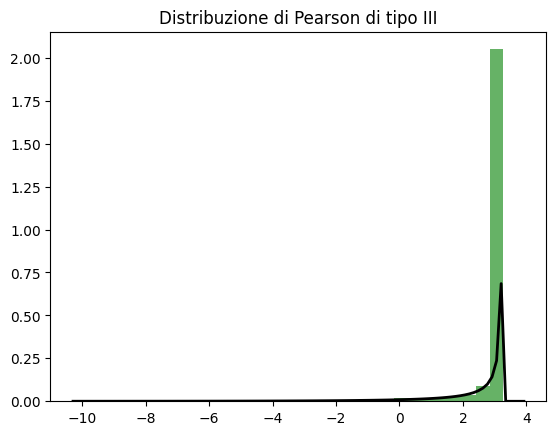

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearson3

# Parametri desiderati
media = weighted_mean
varianza = weighted_variance
asimmetria = weighted_skewness
curtosi = weighted_kurtosis

# Calcola i parametri della distribuzione di Pearson di tipo III
beta = varianza / asimmetria
gamma = np.sqrt(varianza)
alpha = 4 / curtosi

# Genera campioni dalla distribuzione di Pearson di tipo III
np.random.seed(42)
campioni = pearson3.rvs(alpha, loc=media, scale=gamma, size=1000)

# Visualizza l'istogramma dei campioni
plt.hist(campioni, bins=30, density=True, alpha=0.6, color='g')

# Visualizza la densità di probabilità della distribuzione di Pearson di tipo III
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = pearson3.pdf(x, alpha, loc=media, scale=gamma)
plt.plot(x, p, 'k', linewidth=2)

plt.title("Distribuzione di Pearson di tipo III")
plt.show()

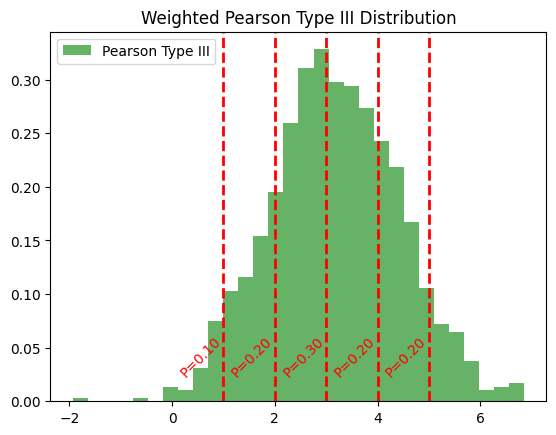

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearson3

def weighted_moments(values, probs):
    weighted_mean = np.sum(values * probs)
    weighted_variance = np.sum((values - weighted_mean)**2 * probs)
    weighted_skewness = np.sum((values - weighted_mean)**3 * probs) / np.power(np.sqrt(weighted_variance), 3)
    weighted_kurtosis = (np.sum((values - weighted_mean)**4 * probs) / np.power(weighted_variance, 2)) - 3
    return weighted_mean, weighted_variance, weighted_skewness, weighted_kurtosis

def plot_weighted_pearson(values, probs, num_samples=1000):
    # Compute weighted moments
    weighted_mean, weighted_variance, weighted_skewness, weighted_kurtosis = weighted_moments(values, probs)

    # Generate samples from Pearson Type III distribution
    samples = pearson3.rvs(weighted_skewness, loc=weighted_mean, scale=np.sqrt(weighted_variance), size=num_samples)

    # Plot histogram of samples
    plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Pearson Type III')

    # Plot bars at original values with heights proportional to their probabilities
    for val, prob in zip(values, probs):
        plt.axvline(x=val, color='r', linestyle='--', linewidth=2)
        plt.text(val, 0.02, f'P={prob:.2f}', rotation=45, ha='right', va='bottom', color='r')

    plt.title("Weighted Pearson Type III Distribution")
    plt.legend()
    plt.show()

# Example values and probabilities
values = np.array([1, 2, 3, 4, 5])
probs = np.array([0.1, 0.2, 0.3, 0.2, 0.2])

# Plot weighted Pearson Type III distribution
plot_weighted_pearson(values, probs)

1.0


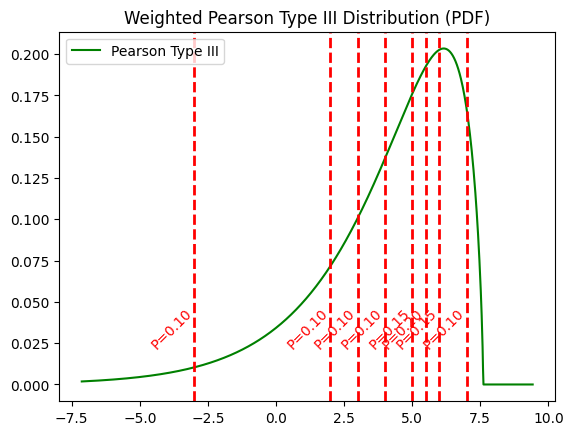

In [182]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearson3

# Example values and probabilities
values = np.array([-3, 2, 3, 4, 5, 5.5, 6, 7])
probs = np.array([0.1, 0.1, 0.1, 0.1, 0.15, 0.2, 0.15, 0.1])

print(sum(probs))

# Compute weighted moments
weighted_mean = np.sum(values * probs)
weighted_variance = np.sum((values - weighted_mean)**2 * probs)
weighted_skewness = np.sum((values - weighted_mean)**3 * probs) / np.power(np.sqrt(weighted_variance), 3)
weighted_kurtosis = (np.sum((values - weighted_mean)**4 * probs) / np.power(weighted_variance, 2)) - 3

# Generate points for the PDF
num_points = 1000
x = np.linspace(pearson3.ppf(0.01, weighted_skewness, loc=weighted_mean, scale=np.sqrt(weighted_variance))-2,
                pearson3.ppf(0.99, weighted_skewness, loc=weighted_mean, scale=np.sqrt(weighted_variance))+2,
                num_points)

# Calculate PDF values at each point
pdf_values = pearson3.pdf(x, weighted_skewness, loc=weighted_mean, scale=np.sqrt(weighted_variance))

# Plot the PDF
plt.plot(x, pdf_values, 'g-', label='Pearson Type III')

# Mark original values on the plot
for val, prob in zip(values, probs):
    plt.axvline(x=val, color='r', linestyle='--', linewidth=2)
    plt.text(val, 0.02, f'P={prob:.2f}', rotation=45, ha='right', va='bottom', color='r')

# Plot settings
plt.title("Weighted Pearson Type III Distribution (PDF)")
plt.legend()
plt.show()

In [189]:

# Esempio di vettore ordinato
values = np.array([1, 2, 3, 4, 5])
probs = np.array([.1, .2, .4, .2, .1])

# Creazione di un nuovo vettore con la media a coppie
bins_exterma = (values[:-1] + values[1:]) / 2

print(bins_exterma)

# Compute weighted moments
weighted_mean = np.sum(values * probs)
weighted_variance = np.sum((values - weighted_mean)**2 * probs)
weighted_skewness = np.sum((values - weighted_mean)**3 * probs) / np.power(np.sqrt(weighted_variance), 3)
weighted_kurtosis = (np.sum((values - weighted_mean)**4 * probs) / np.power(weighted_variance, 2)) - 3

dist = pearson3(weighted_skewness, loc=weighted_mean, scale=np.sqrt(weighted_variance))

print(dist.ppf(probs[0]/4))
print(dist.ppf(1-probs[0]/4))

[1.5 2.5 3.5 4.5]
0.8529670275394108
5.147032972460589


In [ ]:
bins_extrema = (self.values[:-1] + self.values[1:]) / 2


        # Compute weighted moments
        weighted_mean = np.sum(self.values * self.probs)
        weighted_variance = np.sum((self.values - weighted_mean)**2 * self.probs)
        weighted_skewness = np.sum((self.values - weighted_mean)**3 * self.probs) / np.power(np.sqrt(weighted_variance), 3)
        #weighted_kurtosis = (np.sum((self.values - weighted_mean)**4 * self.probs) / np.power(weighted_variance, 2)) - 3

        dist = ss.pearson3(weighted_skewness, loc=weighted_mean, scale=np.sqrt(weighted_variance))

        bins_extrema = np.concatenate([dist.ppf(self.probs[0]/4), bins_extrema, dist.ppf(1-self.probs[0]/4)])


In [1]:
from surgeryschedulingunderuncertainty.uncertainty_profile import *

In [2]:
profile  = HistogramModel(values = [0, 4, 6, 7, 8], probs = [.1, .3, .3, .2, .1])

In [3]:
profile.probs

array([0.1, 0.3, 0.3, 0.2, 0.1])

In [4]:
profile.bin_sampling(10)

array([2.99691194, 4.25691767, 3.23313361, 3.81823654, 2.66651986,
       2.82197553, 2.32858395, 3.42614359, 4.26115936, 4.70218252])

In [5]:
profile.continuous_sampling(20)

array([7.78147315, 8.89414768, 5.8306455 , 0.22342434, 7.20994943,
       1.00017057, 4.86057249, 5.14885584, 3.52682461, 2.99967245,
       5.49292434, 5.0823501 , 4.69917225, 7.24266729, 7.62795517,
       6.50686954, 3.38403177, 3.91866116, 5.45027415, 7.43998197])

In [6]:
profile.pointwise_sampling(10)

array([6, 6, 4, 6, 0, 7, 6, 6, 4, 6])

In [7]:
print(profile.sample(10))

[5.42223992 5.86330291 6.3916144  6.01276456 6.02708725 5.46092807
 5.16092184 5.19139104 6.17662059 6.36984606]


In [8]:
profile = BalancedHistogramModel([10, 15, 20])

In [9]:
profile.values

array([10, 15, 20])

In [10]:
profile.values = [10, 15, 21]

In [11]:
profile.probs

array([0.33333333, 0.33333333, 0.33333333])

In [12]:
profile.probs = [.8, .1, .1]

In [13]:
profile.bin_sampling(10)

array([10.29783513, 11.99718391, 12.22788012,  9.27529716, 12.25717597,
        8.96010836, 12.06362828,  9.65372397, 10.16045616,  9.63338483])

In [14]:
profile.sample(10)

array([12.0452862 , 11.21025242, 11.7627757 , 11.08390319, 11.29420411,
       10.44717964, 10.86457373, 10.35924074,  9.68538585, 11.86742211])

In [15]:
profile = LogNormalDistribution(param_s=10, param_scale=9)

In [17]:
profile.sample(15)

array([ 9.36365539,  2.25782101,  2.6257386 ,  4.67605333, 12.42345374,
       10.7905985 , 31.32760041,  9.12066278, 16.15460048,  1.13928519,
       17.00807855,  8.66006987,  3.34252742,  1.13847221,  2.45267126])

In [18]:
profile = NormalDistribution(param_loc=10, param_scale=5)

In [19]:
profile.param_scale = 4
profile.param_scale

4

In [22]:
profile.sample(9)

array([ 4.21477627,  7.10877976,  8.46322298,  8.96178168,  8.06941551,
       10.89252083, 14.10473102, 12.20189361, 16.42098304])

In [17]:
import pandas as pd
df = pd.read_csv("../not_git/historical_data.csv")

In [18]:
from surgeryschedulingunderuncertainty.patients_provider import PatientsFromHistoricalDataProvider

In [19]:
from surgeryschedulingunderuncertainty.optimizer import ImplementorAdversary

In [20]:
from surgeryschedulingunderuncertainty.task import Task

In [21]:
task = Task(name = "first task", num_of_weeks = 5, num_of_patients = 300, robustness_risk = 0.1, robustness_overtime = 60)

In [22]:
patient_provider = PatientsFromHistoricalDataProvider(task = task, historical_data=df)

In [23]:
patient_provider._historical_data['equipe'].unique()

array(['L', 'I', 'H', 'G', 'F', 'C', 'D', 'B', 'A', 'E'], dtype=object)

In [24]:
patient_provider._historical_data.sample()

,asa_class,target,equipe,blood_required,plasma_required,platelets_required,age,allergy_class_MNC,allergy_class_MNC1,allergy_class_MNC2,...,surgeon_v78f,surgeon_vRho,surgeon_vje3,surgeon_w0qk,surgeon_w9VU,surgeon_xJgc,surgeon_xlU0,surgeon_xyvF,surgeon_yLop,surgeon_yj5u
341,2,109,B,0,0,0,74,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
np.array(patient_provider._historical_data.loc[10, ~patient_provider._historical_data.columns.isin(['gender', 'room'])])

array([3, 158, 'L', ..., 0.0, 0.0, 0.0], dtype=object)

In [27]:
import numpy as np

In [ ]:
import pandas as pd
import random

class PatientListGenerator:
    def __init__(self, dataset_path):
        self.dataset = pd.read_csv(dataset_path)
        self.extracted_patients = set()

    def _check_equipe_proportions(self, equipe_proportions):
        if equipe_proportions is not None:
            total_proportion = sum(equipe_proportions.values())
            if not (0.99 <= total_proportion <= 1.01):
                raise ValueError("The sum of equipe proportions must be close to 1.")

    def _extract_patients_from_equipe(self, equipe_proportions):
        if equipe_proportions is None:
            return self.dataset.sample()

        selected_equipe = random.choices(
            list(equipe_proportions.keys()),
            weights=list(equipe_proportions.values())
        )[0]

        equipe_data = self.dataset[self.dataset['equipe'] == selected_equipe]
        return equipe_data.sample()

    def extract_patients(self, num_patients=1, equipe_proportions=None):
        self._check_equipe_proportions(equipe_proportions)

        extracted_patients = []
        for _ in range(num_patients):
            if self.dataset.empty:
                print("Warning: No more patients available in the dataset.")
                break

            patient_data = self._extract_patients_from_equipe(equipe_proportions)
            patient_index = patient_data.index[0]

            if patient_index in self.extracted_patients:
                print(f"Warning: Patient {patient_index} has already been extracted.")
            else:
                extracted_patients.append(patient_data)
                self.extracted_patients.add(patient_index)

        return pd.concat(extracted_patients, ignore_index=True)

# Esempio di utilizzo
dataset_path = "percorso/del/tuo/dataset.csv"
generator = PatientListGenerator(dataset_path)

# Estrai 5 pazienti proporzionalmente alle equipe
extracted_patients = generator.extract_patients(num_patients=5, equipe_proportions={"equipe_A": 0.4, "equipe_B": 0.6})

# Visualizza i pazienti estratti
print(extracted_patients)
